In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

In [0]:
data_path = '/content/drive/My Drive/Mineria de datos/datasets/ready/'

training_sets_paths = sorted(glob.glob(data_path + "training*.pkl"))
test_sets_paths = sorted(glob.glob(data_path + 'test*.pkl'))

In [0]:
dataset_index = 1

In [0]:
TRAINING = pd.read_pickle(training_sets_paths[dataset_index])
TEST = pd.read_pickle(test_sets_paths[dataset_index])

In [0]:
TEST

,session_id,context_switch1,no_pause_before_play1,short_pause_before_play1,long_pause_before_play1,hist_user_behavior_n_seekfwd1,hist_user_behavior_n_seekback1,hist_user_behavior_is_shuffle1,hour_of_day1,premium1,context_type1,hist_user_behavior_reason_start1,hist_user_behavior_reason_end1,duration1,us_popularity_estimate1,mode1,pca11,pca21,pca31,pca41,pca51,pca61,pca71,pca81,pca91,pca101,pca111,pca121,pca131,pca141,pca151,context_switch2,no_pause_before_play2,short_pause_before_play2,long_pause_before_play2,hist_user_behavior_n_seekfwd2,hist_user_behavior_n_seekback2,hist_user_behavior_is_shuffle2,hour_of_day2,premium2,context_type2,hist_user_behavior_reason_start2,hist_user_behavior_reason_end2,duration2,us_popularity_estimate2,mode2,pca12,pca22,pca32,pca42,pca52,pca62,pca72,pca82,pca92,pca102,pca112,pca122,pca132,pca142,pca152,session_position,session_length,skip
0,12_a69b8ce7-aca4-47f7-8cb8-c31cc1ccbf62,False,False,False,False,0.00188,0.001792,True,0.217391,True,user_collection,appload,trackdone,0.054613,0.999603,major,-3.455482,1.877368,1.995364,0.536173,-1.488531,0.001473,0.024284,0.196970,0.240788,1.224546,-0.575395,-1.062491,-0.307431,1.100043,-1.004540,False,False,False,False,0.00188,0.001792,True,0.217391,True,user_collection,appload,trackdone,0.054613,0.999603,major,-3.455482,1.877368,1.995364,0.536173,-1.488531,0.001473,0.024284,0.196970,0.240788,1.224546,-0.575395,-1.062491,-0.307431,1.100043,-1.004540,1,20,False
1,12_a69b8ce7-aca4-47f7-8cb8-c31cc1ccbf62,False,False,False,False,0.00188,0.001792,True,0.217391,True,user_collection,appload,trackdone,0.054613,0.999603,major,-3.455482,1.877368,1.995364,0.536173,-1.488531,0.001473,0.024284,0.196970,0.240788,1.224546,-0.575395,-1.062491,-0.307431,1.100043,-1.004540,False,True,False,False,0.00000,0.000000,True,0.217391,True,user_collection,trackdone,trackdone,0.108620,0.999127,major,-3.804555,1.386962,1.102104,0.078332,-0.802720,-0.737316,0.045273,0.354202,-0.257112,0.985946,-0.704740,-0.118733,-0.518976,0.125526,-1.082176,2,20,False
2,12_a69b8ce7-aca4-47f7-8cb8-c31cc1ccbf62,False,True,False,False,0.00000,0.000000,True,0.217391,True,user_collection,trackdone,trackdone,0.108620,0.999127,major,-3.804555,1.386962,1.102104,0.078332,-0.802720,-0.737316,0.045273,0.354202,-0.257112,0.985946,-0.704740,-0.118733,-0.518976,0.125526,-1.082176,False,False,True,True,0.00000,0.000000,True,0.217391,True,user_collection,trackdone,fwdbtn,0.102181,0.998949,major,-2.709097,1.101369,0.838783,0.346112,-0.956145,0.244147,0.713198,-0.573867,-0.143695,0.762137,-0.222765,0.444851,0.143464,-0.028739,-1.578013,3,20,False
3,12_a69b8ce7-aca4-47f7-8cb8-c31cc1ccbf62,False,False,True,True,0.00000,0.000000,True,0.217391,True,user_collection,trackdone,fwdbtn,0.102181,0.998949,major,-2.709097,1.101369,0.838783,0.346112,-0.956145,0.244147,0.713198,-0.573867,-0.143695,0.762137,-0.222765,0.444851,0.143464,-0.028739,-1.578013,False,True,False,False,0.00000,0.000000,True,0.217391,True,user_collection,fwdbtn,fwdbtn,0.103091,0.998860,major,-2.066443,1.808430,1.253802,0.540870,-1.116187,0.320123,0.672222,-0.536406,-0.218089,-0.076499,0.394952,-0.054058,-0.645679,0.694989,-1.562882,4,20,True
4,12_a69b8ce7-aca4-47f7-8cb8-c31cc1ccbf62,False,True,False,False,0.00000,0.000000,True,0.217391,True,user_collection,fwdbtn,fwdbtn,0.103091,0.998860,major,-2.066443,1.808430,1.253802,0.540870,-1.116187,0.320123,0.672222,-0.536406,-0.218089,-0.076499,0.394952,-0.054058,-0.645679,0.694989,-1.562882,False,True,False,False,0.00000,0.000000,True,0.217391,True,user_collection,fwdbtn,fwdbtn,0.076757,0.995769,major,-4.442762,2.643711,1.218050,1.735912,-0.983574,-0.660298,-0.044974,0.428376,0.017949,1.195724,-0.030410,-0.108112,-0.065895,-0.153835,-0.608786,5,20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316092,12_aae

One Hot Encoding

In [0]:
columns_fe = []

for i in range(1, 3):
    columns_fe.append('hist_user_behavior_reason_start'+str(i))
    columns_fe.append('hist_user_behavior_reason_end'+str(i))
    columns_fe.append('mode'+str(i))
    columns_fe.append('context_type'+str(i))

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ENCODED_training = []
ENCODED_test = []
for column in columns_fe:
    le = LabelEncoder()
    ohe = OneHotEncoder()

    le.fit(pd.concat([TRAINING[column], TEST[column]], ignore_index=True))

    TEMP_train = le.transform(TRAINING[column])
    TEMP_test  = le.transform(TEST[column])

    ohe.fit(np.append(TEMP_train, TEMP_test).reshape(-1,1))

    X_train = ohe.transform(TEMP_train.reshape(-1,1)).toarray()
    X_test  = ohe.transform(TEMP_test.reshape(-1,1)).toarray()


    ENCODED_training.append(
        pd.DataFrame(X_train, columns=[column+str(i) for i in range(X_train.shape[1])])
    )

    ENCODED_test.append(
        pd.DataFrame(X_test, columns=[column+str(i) for i in range(X_test.shape[1])])
    )

In [0]:
TRAINING = pd.concat([TRAINING] + ENCODED_training, axis=1)
TEST = pd.concat([TEST] + ENCODED_test, axis=1)

In [0]:
TRAINING.drop(columns_fe, axis=1, inplace=True)
TEST.drop(columns_fe, axis=1, inplace=True)

In [0]:
TRAINING


,session_id,context_switch1,no_pause_before_play1,short_pause_before_play1,long_pause_before_play1,hist_user_behavior_n_seekfwd1,hist_user_behavior_n_seekback1,hist_user_behavior_is_shuffle1,hour_of_day1,premium1,duration1,us_popularity_estimate1,pca11,pca21,pca31,pca41,pca51,pca61,pca71,pca81,pca91,pca101,pca111,pca121,pca131,pca141,pca151,context_switch2,no_pause_before_play2,short_pause_before_play2,long_pause_before_play2,hist_user_behavior_n_seekfwd2,hist_user_behavior_n_seekback2,hist_user_behavior_is_shuffle2,hour_of_day2,premium2,duration2,us_popularity_estimate2,pca12,pca22,...,hist_user_behavior_reason_end110,mode10,mode11,context_type10,context_type11,context_type12,context_type13,context_type14,context_type15,hist_user_behavior_reason_start20,hist_user_behavior_reason_start21,hist_user_behavior_reason_start22,hist_user_behavior_reason_start23,hist_user_behavior_reason_start24,hist_user_behavior_reason_start25,hist_user_behavior_reason_start26,hist_user_behavior_reason_start27,hist_user_behavior_reason_start28,hist_user_behavior_reason_start29,hist_user_behavior_reason_start210,hist_user_behavior_reason_start211,hist_user_behavior_reason_end20,hist_user_behavior_reason_end21,hist_user_behavior_reason_end22,hist_user_behavior_reason_end23,hist_user_behavior_reason_end24,hist_user_behavior_reason_end25,hist_user_behavior_reason_end26,hist_user_behavior_reason_end27,hist_user_behavior_reason_end28,hist_user_behavior_reason_end29,hist_user_behavior_reason_end210,mode20,mode21,context_type20,context_type21,context_type22,context_type23,context_type24,context_type25
0,2_9bc2cd30-0a19-478c-b099-13a07f2d2068,False,False,False,False,0.0,0.0,True,0.739130,False,0.150101,0.987441,-2.313220,-0.450730,0.438382,-0.199872,-1.339529,0.877862,0.241260,-0.347495,-0.292176,0.818230,-1.271702,0.343227,-0.307013,-0.218275,-0.840172,False,False,False,False,0.0,0.0,True,0.739130,False,0.150101,0.987441,-2.313220,-0.450730,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2_9bc2cd30-0a19-478c-b099-13a07f2d2068,False,False,False,False,0.0,0.0,True,0.739130,False,0.150101,0.987441,-2.313220,-0.450730,0.438382,-0.199872,-1.339529,0.877862,0.241260,-0.347495,-0.292176,0.818230,-1.271702,0.343227,-0.307013,-0.218275,-0.840172,False,True,False,False,0.0,0.0,True,0.739130,False,0.102960,0.639638,-3.478898,2.453234,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2_9bc2cd30-0a19-478c-b099-13a07f2d2068,False,True,False,False,0.0,0.0,True,0.739130,False,0.102960,0.639638,-3.478898,2.453234,0.931180,2.413325,-0.702331,-0.519001,1.442782,-0.921457,-0.207271,0.902124,0.279183,-0.135953,0.586068,-0.269917,-0.155267,False,False,True,True,0.0,0.0,True,0.739130,False,0.076699,0.994501,-3.018406,1.912431,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2_9bc2cd30-0a19-478c-b099-13a07f2d2068,False,False,True,True,0.0,0.0,True,0.739130,False,0.076699,0.994501,-3.018406,1.912431,0.896272,0.463878,-1.184480,-0.105241,0.886903,-0.585763,-0.107806,0.427872,-0.119667,0.341808,-0.099219,-0.131217,-1.355300,False,True,False,False,0.0,0.0,True,0.739130,False,0.141883,0.282259,-1.756113,0.424212,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2_9bc2cd30-0a19-478c-b099-13a07f2d2068,False,True,False,False,0.0,0.0,True,0.739130,False,0.141883,0.282259,-1.756113,0.424212,-1.222363,2.987149,-1.046316,0.705950,-0.819133,0.544115,-0.969501,-0.273181,-1.240721,0.688475,0.413236,-0.729712,0.225179,False,True,False,False,0.0,0.0,True,0.739130,False,0.116158,0.999318,-2.623821,0.617171,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [0]:
TEST

,session_id,context_switch1,no_pause_before_play1,short_pause_before_play1,long_pause_before_play1,hist_user_behavior_n_seekfwd1,hist_user_behavior_n_seekback1,hist_user_behavior_is_shuffle1,hour_of_day1,premium1,duration1,us_popularity_estimate1,pca11,pca21,pca31,pca41,pca51,pca61,pca71,pca81,pca91,pca101,pca111,pca121,pca131,pca141,pca151,context_switch2,no_pause_before_play2,short_pause_before_play2,long_pause_before_play2,hist_user_behavior_n_seekfwd2,hist_user_behavior_n_seekback2,hist_user_behavior_is_shuffle2,hour_of_day2,premium2,duration2,us_popularity_estimate2,pca12,pca22,...,hist_user_behavior_reason_end110,mode10,mode11,context_type10,context_type11,context_type12,context_type13,context_type14,context_type15,hist_user_behavior_reason_start20,hist_user_behavior_reason_start21,hist_user_behavior_reason_start22,hist_user_behavior_reason_start23,hist_user_behavior_reason_start24,hist_user_behavior_reason_start25,hist_user_behavior_reason_start26,hist_user_behavior_reason_start27,hist_user_behavior_reason_start28,hist_user_behavior_reason_start29,hist_user_behavior_reason_start210,hist_user_behavior_reason_start211,hist_user_behavior_reason_end20,hist_user_behavior_reason_end21,hist_user_behavior_reason_end22,hist_user_behavior_reason_end23,hist_user_behavior_reason_end24,hist_user_behavior_reason_end25,hist_user_behavior_reason_end26,hist_user_behavior_reason_end27,hist_user_behavior_reason_end28,hist_user_behavior_reason_end29,hist_user_behavior_reason_end210,mode20,mode21,context_type20,context_type21,context_type22,context_type23,context_type24,context_type25
0,3_31b0cb5b-ed9d-4d0b-bbfe-572823a1448f,False,False,False,False,0.0,0.0,False,0.956522,True,0.097009,0.999990,-2.715724,-0.388839,1.004899,-0.323170,-1.224750,0.895880,0.602469,-0.588997,0.125138,0.689422,-0.514387,0.117383,-0.203072,0.366345,-0.479651,False,False,False,False,0.0,0.0,False,0.956522,True,0.097009,0.999990,-2.715724,-0.388839,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3_31b0cb5b-ed9d-4d0b-bbfe-572823a1448f,False,False,False,False,0.0,0.0,False,0.956522,True,0.097009,0.999990,-2.715724,-0.388839,1.004899,-0.323170,-1.224750,0.895880,0.602469,-0.588997,0.125138,0.689422,-0.514387,0.117383,-0.203072,0.366345,-0.479651,False,True,False,False,0.0,0.0,False,0.956522,True,0.064389,0.999962,-1.707139,-0.771115,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3_31b0cb5b-ed9d-4d0b-bbfe-572823a1448f,False,True,False,False,0.0,0.0,False,0.956522,True,0.064389,0.999962,-1.707139,-0.771115,0.694225,0.191556,-1.438158,1.020193,0.011535,-0.143195,-0.274865,1.016988,-0.771808,-0.025235,0.049653,0.364575,-0.505293,False,True,False,False,0.0,0.0,False,0.956522,True,0.103615,0.999970,-2.865352,0.762270,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3_31b0cb5b-ed9d-4d0b-bbfe-572823a1448f,False,True,False,False,0.0,0.0,False,0.956522,True,0.103615,0.999970,-2.865352,0.762270,0.575955,0.331060,-1.053229,-0.085963,0.246293,-0.078844,-0.008216,0.079329,-0.341685,0.673633,0.377253,-0.408568,-0.812573,True,False,True,True,0.0,0.0,False,0.956522,True,0.088720,0.999074,-3.289385,0.195659,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3_31b0cb5b-ed9d-4d0b-bbfe-572823a1448f,True,False,True,True,0.0,0.0,False,0.956522,True,0.088720,0.999074,-3.289385,0.195659,0.775503,-0.141168,-0.608883,0.032741,0.920977,-0.721444,-0.080396,0.952242,-0.911645,-0.070859,-0.332444,-0.054059,-0.630221,True,True,False,False,0.0,0.0,False,0.956522,True,0.097009,0.999990,-2.715724,-0.388839,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

### Getting ready

In [0]:
features_column_names = list(TRAINING.columns)
features_column_names.remove('skip')
features_column_names.remove('session_length')
features_column_names.remove('session_position')
features_column_names.remove('session_id')

In [0]:
train_indexes = list(TRAINING.index.values)
train_indexes_len = len(train_indexes)
split_size = int(train_indexes_len/8)

train_splits = []
for i in range(7):
    train_splits.append(train_indexes[:split_size])
    del train_indexes[:split_size]
train_splits.append(train_indexes)

## Training

### Naive Bayes




In [0]:
from sklearn.naive_bayes import ClassifierMixin
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score





####**Prueba DataSetDummy** (Naive Bayes)




In [0]:
#Prueba con DataSetDummy
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
         'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

le = preprocessing.LabelEncoder()
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

"""print(weather_encoded)
print(temp_encoded)
print(label)"""

features=zip(weather_encoded,temp_encoded)
features2= np.array(list(features))
print (list(features))
print(features2)

#Sigo con la prueba

model = GaussianNB()
model.fit(list(features2),label)
predicted= model.predict([[0,2]])
print ("Predicted Value:"+ str(predicted))


####**Prueba Multilabeles** (Naive Bayes)

In [0]:
from sklearn import datasets
#Prueba con Multilabeles

wine = datasets.load_wine()
print(wine.feature_names)
print(wine.target_names)
print (wine.data)
print(wine.target)
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) 
# 70% training and 30% test
print (type(X_train))
print(type(y_train))


In [0]:
gnb = GaussianNB(var_smoothing=0.1)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 2 2 1 0 1 0 0 1 0 1 0 2 2 0 1 1 2 0 2 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0
 1 1 0 2 2 0 0 2 1 1 0 1 1 2 0 0 1]
Accuracy: 0.6481481481481481


####**DataSet Real** (Naive Bayes)

La distribucion de Bernoulli no se puede usar ya que para eso todos los features requieren ser de tipo binario, voy a ver que pasa con Multinomial que parece que si podria estar funcionando

In [0]:

valores_testing=list(range(len(TEST.index)))


In [0]:
valores_training=(train_splits[0])[:int(len(train_splits[0])/2)]
len(valores_training)

339066

In [0]:
#Prueba con DataSet 100% real no fake
y_train = (TRAINING.loc[train_splits[0], 'skip']).values
y_test = (TEST.loc[train_splits[0], 'skip']).values

X_train= (TRAINING.loc[train_splits[0], features_column_names])
X_test= (TEST.loc[train_splits[0], features_column_names])

y_train
print((len(y_train)))
print((len(y_test)))
print((type(y_train)))
print((type(y_test)))

678133
678133
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#####GaussianNB model

**GaussianNB model**
Me di cuenta de que el priors se puede modificar cuando es instansiado, lo que hace eso es modificar la probabilidad de que una de las clases sea elegida como unos de los labeles finales para ser clasificado, pero aqui ya dejaria de basarse en la distribucion de la data sino del valor que nosotros le pongamos

In [0]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(gnb.class_prior_)



[False  True False ...  True  True False]
Accuracy: 0.8603601204370072
[0.49187426 0.50812574]


In [0]:
accuaracys=[]


In [0]:
priors_ind=["0.0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0","default"]
smoothing_ind=["e18","e17","e16","e15","e14","e13","e12","e11","e10","e9","e8","e7",
               "e6","e5","e4","e3","e2","e1","1"]


Al modificar el hiperParametro priors, nos dimos cuenta de que en realidad el mejor valor que puede tener es el que viene por defecto, es decir los valores que obtiene al analizar la distribucion, esto con un accuaracy del 0.86 

In [0]:
accuaracy_xdataset=[]
prior0=0.0
prior1=1.0  
gnb = GaussianNB(priors=[prior0, prior1])
scores = cross_val_score(gnb,X_train,y_train, cv=5)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(scores)
print("Priors Num: %0.2f, Accuracy: %0.2f (+/- %0.2f)" % (0,scores.mean(), scores.std() * 2))
accuaracy_xdataset.append(scores.mean())
for i in range(10):
  prior0+=0.1
  prior1-=0.1
  gnb = GaussianNB(priors=[prior0, prior1])
  scores = cross_val_score(gnb,X_train,y_train, cv=5)
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)
  print("############################################################")
  print(scores)
  print(prior0)
  print(prior1)
  print("Priors Num: %0.1f, Accuracy: %0.4f (+/- %0.3f)" % (i+1,scores.mean(), scores.std() * 2))
  accuaracy_xdataset.append(scores.mean())



In [0]:
accuaracy_xdataset

[0.5083366716415584,
 0.8555619287913675,
 0.8552766587008966,
 0.8551977552948777,
 0.8552903191993216,
 0.855432956765832,
 0.8558851467766816,
 0.8561188292427435,
 0.856581641500467,
 0.8569731348195141,
 0.5484783445567254,
 0.8554359915290437]

In [0]:
gnb = GaussianNB()
scores = cross_val_score(gnb,X_train,y_train, cv=5)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(scores)
print("Priors Num: %0.2f, Accuracy: %0.2f (+/- %0.2f)" % (0,scores.mean(), scores.std() * 2))
accuaracy_xdataset.append(scores.mean())
accuaracys.append(accuaracy_xdataset)



[0.85004249 0.85533713 0.85666487 0.85906998 0.85606549]
Priors Num: 0.00, Accuracy: 0.86 (+/- 0.01)


12
12


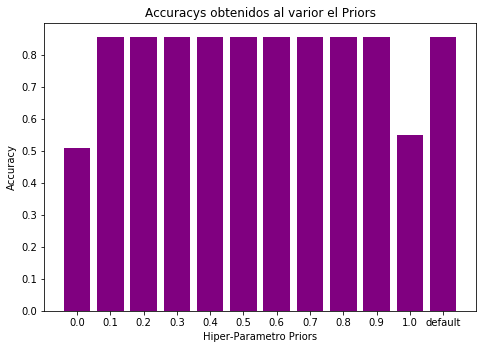

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(len(accuaracy_xdataset))
print(len(priors_ind))
ax.bar(priors_ind, accuaracy_xdataset,color='purple')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Hiper-Parametro Priors')
ax.set_title('Accuracys obtenidos al varior el Priors')


plt.show()

In [0]:
)

1e-09


Variacion del HiperParametro Smoothing de GaussianNB, al hacer las comprobaciones, se da cuenta que el mejor valor es el e 1e-9, esto esta al final, donde se comprueba que los mejors valores son aquelos que estan por default

In [0]:
accuaracy_ydataset=[]
smoothing= 1e-18
gnb = GaussianNB(var_smoothing=smoothing)
scores = cross_val_score(gnb,X_train,y_train, cv=5)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(scores)
print("Priors Num: %0f, Accuracy: %0.2f (+/- %0.2f)" % (0,scores.mean(), scores.std() * 2))
accuaracy_ydataset.append(scores.mean())

for i in range(18):
  smoothing *=10
  gnb = GaussianNB(var_smoothing=smoothing)
  scores = cross_val_score(gnb,X_train,y_train, cv=5)
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)
  print("############################################################")
  print(scores)
  print(smoothing)
  print("Priors Num: %0f, Accuracy: %0.4f (+/- %0.3f)" % (i+1,scores.mean(), scores.std() * 2))
  accuaracy_ydataset.append(scores.mean())
accuaracys.append(accuaracy_ydataset)


In [0]:
gnb = GaussianNB(priors=None,var_smoothing=1e-9)
scores = cross_val_score(gnb,X_train,y_train, cv=5)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(scores)
print("Priors Num: %0.2f, Accuracy: %0.2f (+/- %0.2f)" % (0,scores.mean(), scores.std() * 2))

[0.85004249 0.85533713 0.85666487 0.85906998 0.85606549]
Priors Num: 0.00, Accuracy: 0.86 (+/- 0.01)


In [0]:
accuaracy_ydataset

[0.8560824108293236,
 0.8561127591637122,
 0.8561294507412937,
 0.8560915153376991,
 0.8560353709403788,
 0.8559913658722088,
 0.8557045742210325,
 0.8551567869931243,
 0.8545391986226015,
 0.8554359915290437,
 0.856924576869716,
 0.8542645468762091,
 0.8505924004299207,
 0.850630335741414,
 0.8505408084422091,
 0.8510840423279824,
 0.8525088937729546,
 0.8110971531930534,
 0.7843633541507169]

19
19


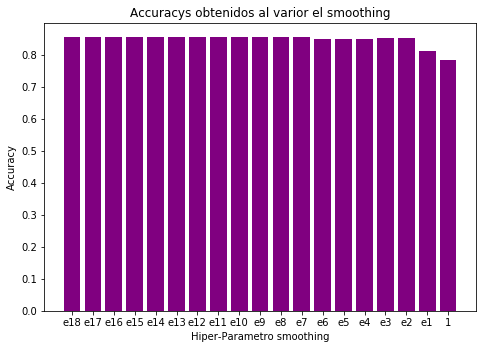

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(len(accuaracy_ydataset))
print(len(smoothing_ind))
ax.bar(smoothing_ind, accuaracy_ydataset,color='purple')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Hiper-Parametro smoothing')
ax.set_title('Accuracys obtenidos al varior el smoothing')


plt.show()

In [0]:
#Aqui es donde empiza la prueba de cambiar el valor del prior
X = [[1, 0], [1, 0], [0, 1]]
y = [0, 0, 1]
# use empirical prior, learned from y
mn = GaussianNB()

X= np.asarray(X)
y=np.asarray(y) 
print(type(X))
print(type(y))
vari=mn.fit(X,y)

print (vari.predict([[1,1]]))
print (mn.class_prior_)

mn = GaussianNB(priors=[0.1, 0.9])
print(mn.fit(X,y).predict([[1,1]]))
print(mn.class_prior_)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
[0.66666667 0.33333333]
[1]
[0.1 0.9]


In [0]:
accuaracys_diff_datasets=[]

In [0]:
labeles=["659016-1316097","1318032-1316097","659016-659016","1318032-659016","1977048-659016"]

In [0]:
pruebas_L=["1-2","2-2","1-1","2-1","3-1"]

In [0]:
respaldo=[0.8567370034275589,
 0.8560455650305411,
 0.8568031732158248,
 0.8561264066426308,
 0.8559215557740631]

In [0]:

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(gnb.class_prior_)
accuaracys_diff_datasets.append(metrics.accuracy_score(y_test, y_pred))

In [0]:
accuaracys_diff_datasets

[0.8567370034275589,
 0.8560455650305411,
 0.8568031732158248,
 0.8561264066426308,
 0.8559215557740631]

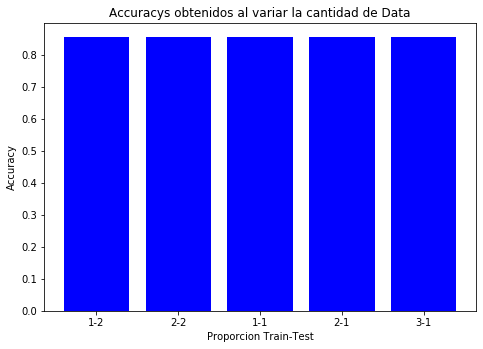

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pruebas_L, respaldo,color='blue')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Proporcion Train-Test')
ax.set_title('Accuracys obtenidos al variar la cantidad de Data')


plt.show()

In [0]:
X_train

In [0]:
correlacion=X_train.corr(method="pearson")


In [0]:
correlacion

In [0]:
import matplotlib.pyplot as plt
plt.plot(X_train["short_pause_before_play1"],X_train["long_pause_before_play1"],"ro")

In [0]:
plt.matshow(correlacion)

In [0]:
train_sizees = [100, 1000, 10000, 100000, 500000,1000000]


In [0]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
estimator = GaussianNB(),
X = TRAINING[features_column_names],
y = TRAINING['skip'], train_sizes = train_sizees, cv = 5)

In [0]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[1.       0.89     0.89     0.89     0.89    ]
 [0.795    0.862    0.862    0.862    0.862   ]
 [0.8503   0.8584   0.8584   0.8584   0.8584  ]
 [0.85508  0.84898  0.84898  0.84898  0.84898 ]
 [0.850496 0.85107  0.85107  0.85107  0.85107 ]
 [0.848849 0.85746  0.85746  0.85746  0.85746 ]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.494795   0.85031714 0.85034202 0.85034387 0.85019087]
 [0.84921775 0.83723712 0.83671363 0.83694865 0.83589981]
 [0.85673101 0.8539005  0.85343138 0.85368484 0.85339913]
 [0.85260849 0.84957245 0.84914573 0.84928121 0.8482591 ]
 [0.84882052 0.85134938 0.85087658 0.85110699 0.85020101]
 [0.84845924 0.85739631 0.85712811 0.85748847 0.85767649]]


In [0]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 100        0.912000
1000       0.848600
10000      0.856780
100000     0.850200
500000     0.850955
1000000    0.855738
dtype: float64

 --------------------

Mean validation scores

 100        0.779198
1000       0.839203
10000      0.854229
100000     0.849773
500000     0.850471
1000000    0.855630
dtype: float64


In [0]:
train_scores_mean

array([0.912    , 0.8486   , 0.85678  , 0.8502   , 0.8509552, 0.8557378])

In [0]:
validation_scores_mean

array([0.77919778, 0.83920339, 0.85422937, 0.84977339, 0.8504709 ,
       0.85562972])

(0.77, 0.92)

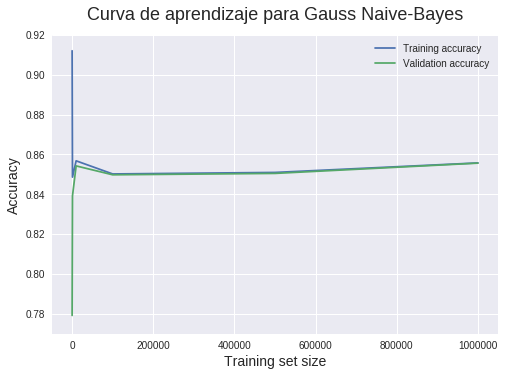

In [0]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Curva de aprendizaje para Gauss Naive-Bayes', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.77,0.92)